<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/qiskit_teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-bv7qzx6g
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-bv7qzx6g
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [2]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

In [3]:
def initialize_qubit(given_circuit, qubit_index):

    import numpy as np
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.initialize([np.sqrt(0.7), np.sqrt(0.3)], qubit_index)

    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

In [4]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.h(qubit_Alice)
    given_circuit.cnot(qubit_Alice, qubit_Bob)

    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

In [5]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.cnot(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)

    given_circuit.barrier()

    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

In [6]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1)
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

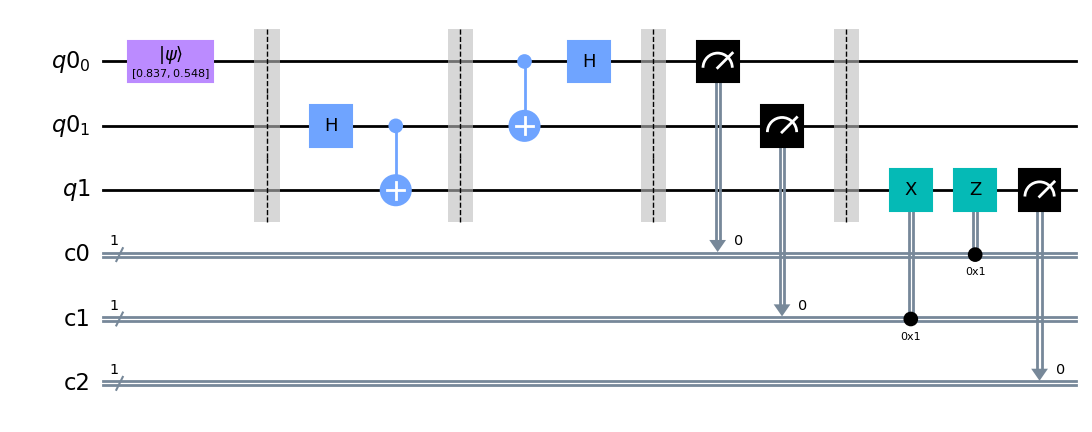

In [7]:
### imports
from qiskit import QuantumRegister, ClassicalRegister, transpile
from qiskit.result import marginal_counts

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)
creg_Bob = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice, creg_Bob)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()

# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()

# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

mycircuit.measure(all_qubits_Bob, creg_Bob)
### Look at the complete circuit
mycircuit.draw("mpl")

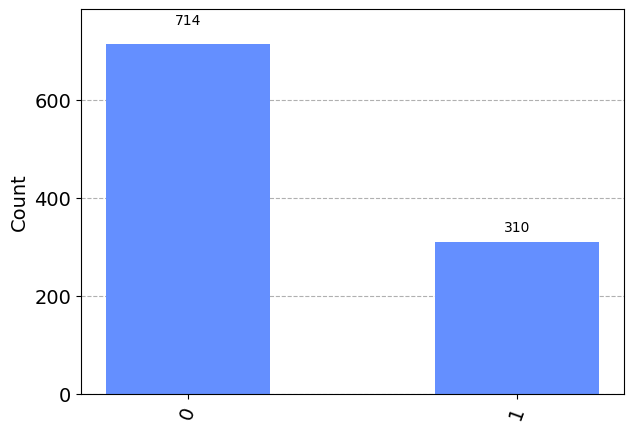

In [8]:
from qiskit import execute
shots = 1024
backend = Aer.get_backend('qasm_simulator')
job = execute(mycircuit, backend=backend, shots=shots)
result = job.result()
counts = result.get_counts(mycircuit)
one_count = 0
zero_count = 0
for key in counts.keys():
  if key[0] == '0':
    zero_count += counts[key]
  elif key[0] == '1':
    one_count += counts[key]

count_final = {"1":one_count, "0":zero_count}
plot_histogram(count_final)